# Perceptron 
#### (Artificial Neuron)

- A Perceptron is a single layer neural network
- It acts a Linear Classifier, Binary classification
- Loss Function : Binary Cross Entropy   
(-ve of Log Likelihood)
- Optimisation : Gradient Descent/ Stochastic Gradient Descent

### Learning Goals
- How to implement Perceptron?
- Understanding **Vectorization**,  
  writing efficient Code   
  without using for loop!  
- What is the meaning of "Linear Classifier"?

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

### Generating Data

In [75]:
#X,Y = make_blobs(n_samples=500, centers=2,n_features=2,random_state=1)
X,Y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=1)
print(X.shape,Y.shape)

(1000, 2) (1000,)


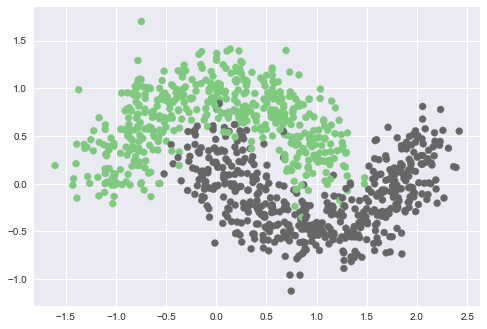

In [77]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Accent)
plt.show()

## Model and helper functions

In [78]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

## Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss 
- Make the Preditctions

In [79]:
def predict(X,weights):
    """X -> mx(n+1) matrix, w -->(nX1,) vector"""
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    
    #Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    #Init Weights 0
    weights = np.zeros(X.shape[1]) #n+1 entires
    
    
    #Iterate over all epochs and make updates
    
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights
    
    
    
    

In [80]:
weights = train(X,Y,learning_rate=0.8,maxEpochs=1000)

Epoch 0 Loss 0.6234
Epoch 10 Loss 0.4134
Epoch 20 Loss 0.3672
Epoch 30 Loss 0.3457
Epoch 40 Loss 0.3327
Epoch 50 Loss 0.3239
Epoch 60 Loss 0.3175
Epoch 70 Loss 0.3128
Epoch 80 Loss 0.3091
Epoch 90 Loss 0.3063
Epoch 100 Loss 0.3041
Epoch 110 Loss 0.3023
Epoch 120 Loss 0.3009
Epoch 130 Loss 0.2997
Epoch 140 Loss 0.2988
Epoch 150 Loss 0.2980
Epoch 160 Loss 0.2973
Epoch 170 Loss 0.2968
Epoch 180 Loss 0.2963
Epoch 190 Loss 0.2959
Epoch 200 Loss 0.2956
Epoch 210 Loss 0.2953
Epoch 220 Loss 0.2951
Epoch 230 Loss 0.2949
Epoch 240 Loss 0.2947
Epoch 250 Loss 0.2946
Epoch 260 Loss 0.2944
Epoch 270 Loss 0.2943
Epoch 280 Loss 0.2942
Epoch 290 Loss 0.2941
Epoch 300 Loss 0.2941
Epoch 310 Loss 0.2940
Epoch 320 Loss 0.2940
Epoch 330 Loss 0.2939
Epoch 340 Loss 0.2939
Epoch 350 Loss 0.2938
Epoch 360 Loss 0.2938
Epoch 370 Loss 0.2938
Epoch 380 Loss 0.2938
Epoch 390 Loss 0.2937
Epoch 400 Loss 0.2937
Epoch 410 Loss 0.2937
Epoch 420 Loss 0.2937
Epoch 430 Loss 0.2937
Epoch 440 Loss 0.2937
Epoch 450 Loss 0.2937

 
### Perceptron Implementation - Part-II 
- Make Predictions
- Visualise Decison Surface
- Linear vs Non-linear classification

In [81]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))

    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [84]:
x1 = np.linspace(-2,2,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

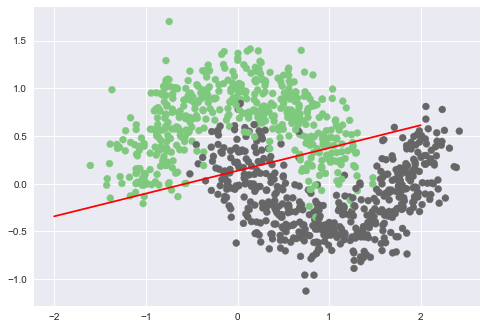

In [85]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [86]:
# Find the accuracy!
Y_ = getPredictions(X,weights,labels=True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

0.869
